# Table of Content
* [Reading and Inspecting Data](#reading)
* [Data Cleaning](#data_cleaning)
    * [Handling Missing values](#handling_missing_values)
* [Unvariate Analysis](#univariate_analysis)
* [Bivariate Analysis](#bivariate_analysis)
* [Summary](#summary)

# Reading and Inspecting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Dataset has 8807 rows and 12 columns


<a id = 'data_cleaning'></a>
# Data Cleaning

<a id = 'handling_missing_values'></a>
## Handling Missing Values

In [4]:
# check % of missing values
df.isnull().mean()*100


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [5]:
# replacing NaN with 'unknown' in director columns
df['director'] = df['director'].fillna('unknown')
df['director'].isnull().sum()

0

In [6]:
# replacing NaN with 'unknown' in cast columns
df['cast'] = df['cast'].fillna('unknown')
df['cast'].isnull().sum()

0

In [7]:
df['country'] = df['country'].fillna('unknown')
df['country'].isnull().sum()

0

* **"data_added, rating, duration" feature have less amount of NaN values,we can directly drop that.**

In [8]:
df.dropna(inplace = True)
df.isnull().mean()*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

<a id ='univariate_analysis'></a>
# Univariate Analysis

## Analysing 'Type' feature

In [9]:
df['type'].nunique()

2

In [10]:
df['type'].value_counts(normalize=True)

Movie      0.696928
TV Show    0.303072
Name: type, dtype: float64

<Axes: >

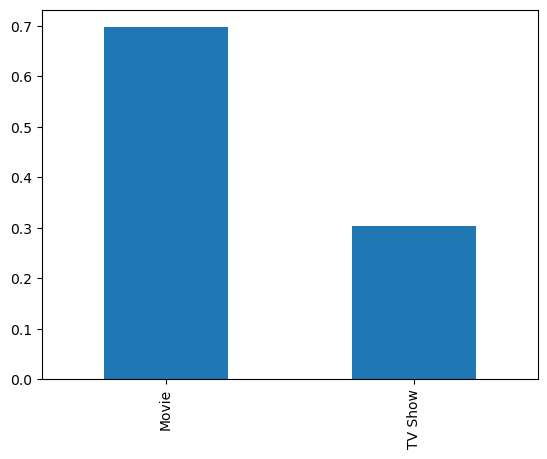

In [11]:
df['type'].value_counts(normalize=True).plot.bar()

* **Inference:**
* On Netflix  69% are Movie and 31% are TV Show

## Analysing 'director' feature

In [12]:
df['director'].nunique()

4527

In [13]:
df['director'].value_counts()

unknown                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

**inference**
* Director "Rajiv Chilaka" has released highest number of shows.

## Analysing 'country' Feature

In [14]:
df['country'].nunique()

749

In [15]:
# Top 3 countries based on count on shows
df['country'].value_counts(normalize=True)[:3]

United States    0.319568
India            0.110580
unknown          0.094312
Name: country, dtype: float64

<Axes: >

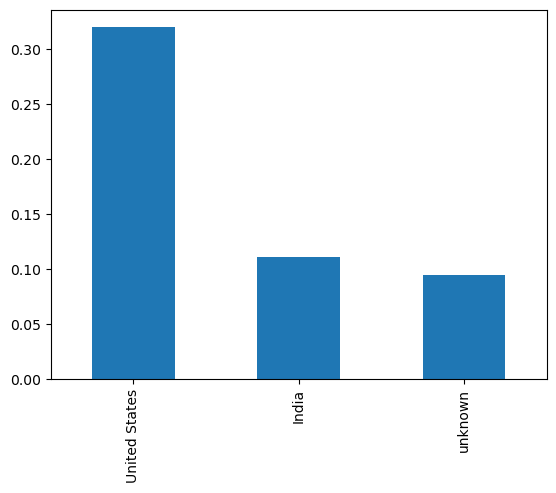

In [16]:
df['country'].value_counts(normalize=True)[:3].plot.bar()

**Inference**
* On Netflix most of the shows are from USA(31%) and India(11%)

## Analysing 'rating' feature

In [17]:
df.rating.nunique()

14

<Axes: >

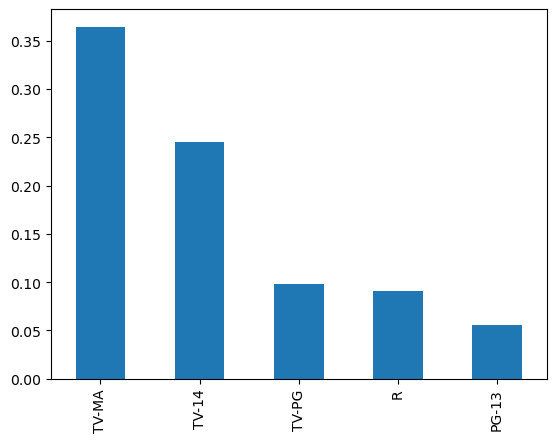

In [18]:
df.rating.value_counts(normalize=True)[:5].plot.bar()

**Inference**
* Most of the movies have got rating 'TV-MA,TV-14,TV-PG'.

In [19]:
# Analysing 'listed_in' feature
genre_list = df['listed_in'].str.split(',')

In [20]:
df['genre_1'] = genre_list.str.get(0)
df['genre_2'] = genre_list.str.get(1)
df['genre_3'] = genre_list.str.get(2)


In [21]:
# droping column 'listed_in'
df.drop('listed_in',axis =1,inplace =True)

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre_1,genre_2,genre_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",Docuseries,Reality TV,NaN
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,International TV Shows,Romantic TV Shows,TV Comedies


<Axes: >

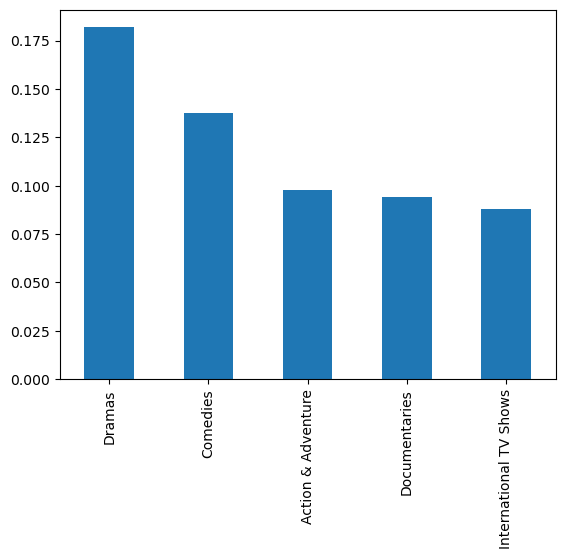

In [23]:
df['genre_1'].value_counts(normalize=True)[:5].plot.bar()

**Inference**
* Netflix has highest (i.e.17% ) shows of 'Drama' genre,followed by 'Comedies' genre.

<a id = 'bivariate Analysis'></a>
# Bivariate Analysis

In [24]:
temp_df = df[df['country'].isin(df['country'].value_counts()[:5].index)]

<Axes: xlabel='country', ylabel='count'>

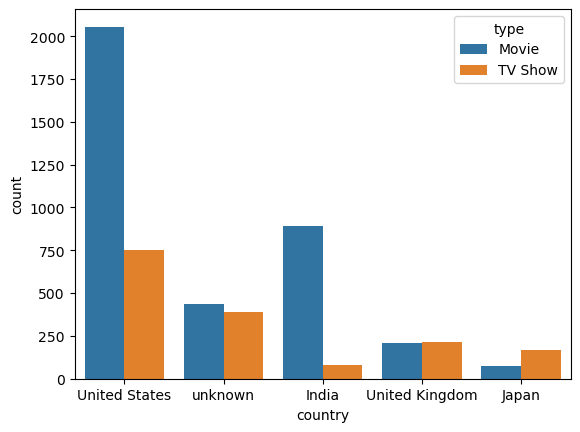

In [25]:
sns.countplot(data=temp_df,x='country',hue='type')

**Inference:**
* In USA and India 'Movie' show are more famous than 'TV Shows',and in United Kingdom both type are equily popular,and In Japan 'TV shows' are more popular than 'Movie' shows.

In [26]:
list(df['country'].value_counts()[:5].index)

['United States', 'India', 'unknown', 'United Kingdom', 'Japan']

<Axes: xlabel='country', ylabel='count'>

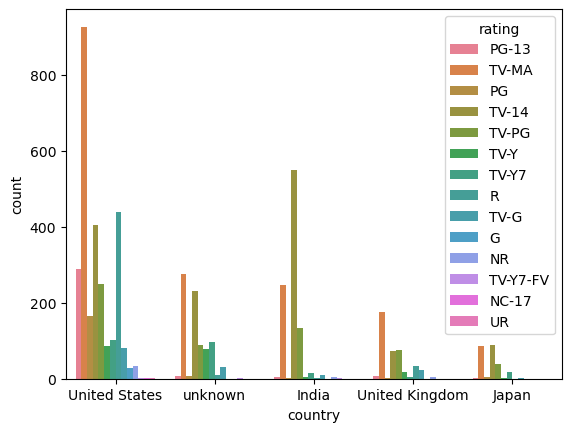

In [27]:
sns.countplot(data=temp_df,x='country',hue='rating')

**Inference**:
* for United states most of the shows have 'TV-MA' rating and in India most of the shows have 'TV-14' rating.

<Axes: xlabel='country', ylabel='count'>

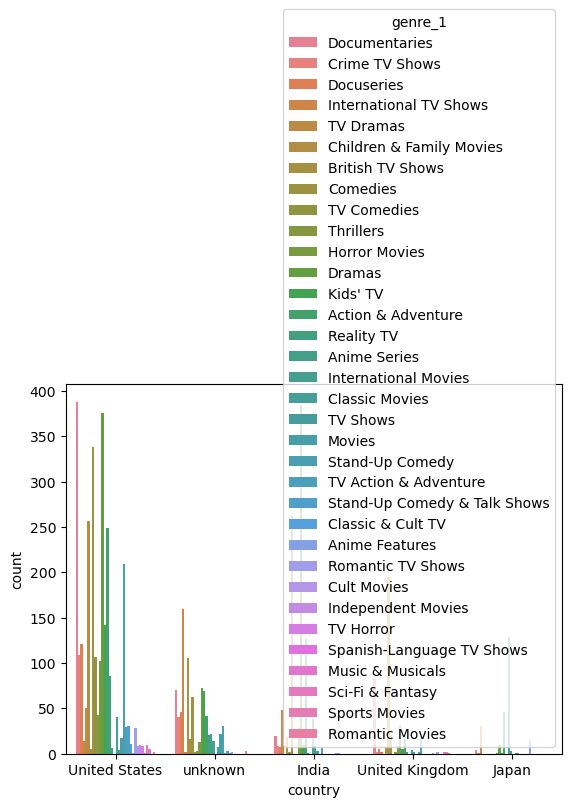

In [30]:
sns.countplot(data=temp_df,x='country',hue='genre_1')

<a id ='summary'></a>
# Summary
* On Netflix 69% are Movie and 31% are TV Show
* Director "Rajiv Chilaka" has released highest number of shows.
* On Netflix most of the shows are from USA(31%) and India(11%).
* Highest number of shows added was in 2019.
* 'July,December,September' are the months in which most of the shows are released.
* Most of the shows  are of  rating 'TV-MA,TV-14,TV-PG'.
* Netflix has highest (i.e.17% ) shows of 'Drama' genre,followed by 'Comedies' genre.
* In USA and India 'Movie' show are more famous than 'TV Shows',and in United Kingdom both type are equily popular,and In Japan 'TV shows' are more popular than 'Movie' shows.
* for United states most of the shows have 'TV-MA' rating and in India most of the shows have 'TV-14' rating.